In [1]:
#TASK: COMP9517 LAB4
#ZID: Z5239391

In [2]:
#STEP 1

from sklearn import metrics 
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
import cv2
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#STEP 2

digits = datasets.load_digits()
print('The length of data: ',len(digits.data))

The length of data:  1797


Text(0.5, 1.0, 'Label: 8\n')

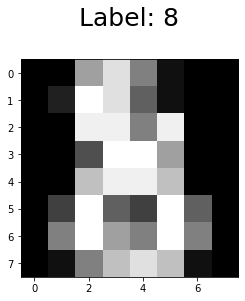

In [4]:
plt.imshow(np.reshape(digits.data[1796], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[1796], fontsize=25)

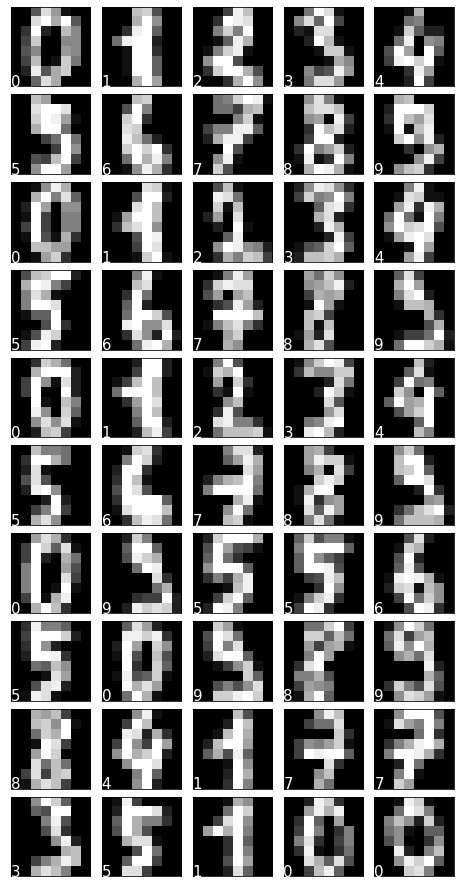

In [5]:
fig, axes = plt.subplots(10,5, figsize=(8, 16),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.text(0, 0, str(digits.target[i]),transform=ax.transAxes, color='white', size = 15)

In [6]:
#STEP 3
train_set_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=train_set_size, random_state=0)

In [8]:
#Experiment with the number of neighbours used in the KNN classifier
Accuracy_scores = {}
Recall_scores = {}
for n in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, Y_train)
    Y_hat = knn.predict(X_test)
    Accuracy_scores[n] = metrics.precision_score(Y_test, Y_hat, average='macro')
    Recall_scores[n] = metrics.recall_score(Y_test, Y_hat, average='macro')

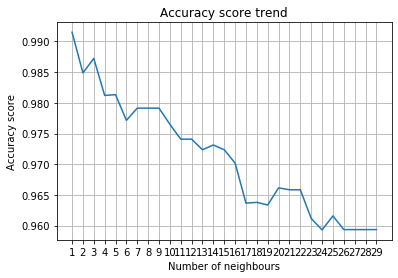

In [9]:
X = [x for x in Accuracy_scores.keys()]
Y = [y for y in Accuracy_scores.values()]
plt.plot(X,Y)
plt.xticks(np.arange(1,30,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy score')
plt.title('Accuracy score trend')
plt.grid()
plt.show()

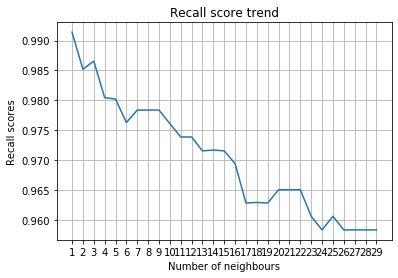

In [10]:
X = [x for x in Recall_scores.keys()]
Y = [y for y in Recall_scores.values()]
plt.plot(X,Y)
plt.xticks(np.arange(1,30,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Recall scores')
plt.title('Recall score trend')
plt.grid()
plt.show()

In [11]:
'''
I choose n = 9 because it has good accuracy and recall scores. 
Although the smaller N has better scores,
but it will cause overfitting problems.
'''

'\nI choose n = 9 because it has good accuracy and recall scores. \nAlthough the smaller N has better scores,\nbut it will cause overfitting problems.\n'

In [12]:
#STEP4-7
score_dict = {}

def pred_print(model, X_test, Y_test):
    Y_hat = model.predict(X_test)
    precision_score = metrics.precision_score(Y_test, Y_hat, average='macro')
    recall_score = metrics.recall_score(Y_test, Y_hat, average='macro')
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_hat)
    return {'accuracy':precision_score, 'recall':recall_score, 'matrix' :confusion_matrix}


In [13]:
#Classification - KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)
score_dict['KNN'] = pred_print(knn, X_test, Y_test)

#Classification - SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
score_dict['SGD'] = pred_print(sgd, X_test, Y_test)

#Classification - DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
score_dict['DT '] = pred_print(dt, X_test, Y_test)

In [14]:
#STEP7 OUTPUT
print('COMP9517 Week 5 Lab - z5239391\n')
print('Test size = ', train_set_size)
for key in score_dict.keys():
    print(key, ' Accuracy: ', '%.3f' % score_dict[key]['accuracy'], ' '*4, ' Recall: ', '%.3f' % score_dict[key]['recall'])
for key in score_dict.keys():
    print('\n', key, 'Confusion matrix:\n', score_dict[key]['matrix'])

COMP9517 Week 5 Lab - z5239391

Test size =  0.25
KNN  Accuracy:  0.979       Recall:  0.978
SGD  Accuracy:  0.947       Recall:  0.945
DT   Accuracy:  0.851       Recall:  0.846

 KNN Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  1  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  2  0  0  0  1 42  0]
 [ 0  0  0  0  0  1  0  0  0 46]]

 SGD Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  0  2]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  1 50  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  4  1  1  1  1  0  0 35  5]
 [ 0  0  0  0  0  1  0  0  0 46]]

 DT  Confusion matrix:
 [[33  0  0  2  1  1  0  0  0  0]
 [ 0 36  4  1  1  0  1  0  0  0]
 [ 1  2 37  2  0  